## Importing Libraries

In [2]:
from textblob import TextBlob
from transformers import pipeline
import matplotlib.pyplot as plt

## Declaring Sample Text

In [3]:
text = """One of social psychologists’ greatest passions is scouring human behavior for its many failures of rationality and perception, the systematic biases that push us off track. “Negativity bias,” the tendency for negative information and experiences to overwhelm the positive, kept coming up. As early as 1967, psychologist Marjorie Richey and co-authors concluded that university students, given paragraphs describing a stranger’s personality, were influenced more by negative descriptions than positive ones. In 1982, Teresa Amabile and Ann Glazebrook proposed that there might be a general “bias toward negativity in evaluations of persons or their work,” noting that already by that point, a number of other studies had found the same."""

## Getting Sentiment of the sentence (negative, neutral, positive)

In [4]:
blob = TextBlob(text)
senti = blob.sentiment.polarity

if senti < 0:
    sentiment = 'negative'
elif senti > 0:
    sentiment = 'positive'
else:
    sentiment = 'netural'

## Getting Emotion of sentence

In [5]:
# classifier = pipeline("text-classification", model="j-hartmann/emotion-english-distilroberta-base", return_all_scores=True)
# output = classifier(text)

# high_score = 0
# emotion = ''

# for dict in output[0]:
#     if dict['score'] > high_score:
#         high_score = dict['score']
#         emotion = dict['label']
#     else:
#         continue

## Model with more emotions

In [6]:
classifier = pipeline(task="text-classification", model="SamLowe/roberta-base-go_emotions", top_k=None)

model_outputs = classifier(text)

high_score_1 = 0
emotion_1 = ''

for dict in model_outputs[0]:
    if dict['score'] > high_score_1:
        high_score_1 = dict['score']
        emotion_1 = dict['label']
    else:
        continue

print(high_score_1)

0.8011133670806885


## Plotting Graph

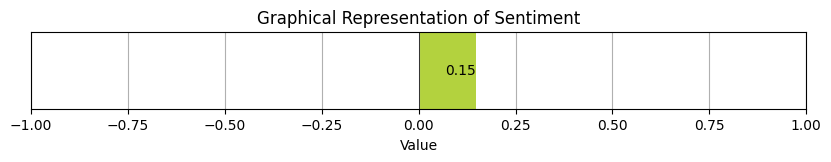

In [10]:
if sentiment == 'positive':
    col = "#b3d23e"
elif sentiment == 'negative':
    col = "#FF6666"

fig, ax = plt.subplots(figsize=(10, 1))
ax.barh(y=0, width=senti, height=2, color=col)

ax.set_xlim(-1, 1)
ax.set_ylim(-1, 1)

ax.grid(True)

ax.axvline(0, color='black', linewidth=0.5)

ax.set_title('Graphical Representation of Sentiment')
ax.set_xlabel('Value')
ax.get_yaxis().set_visible(False)

ax.text(senti, 0, f'{senti:.2f}', color='black', va='center', ha='left' if senti < 0 else 'right')
plt.show()

## Output

In [8]:
print("Sentiment =", sentiment, senti)
print("Emotion =", emotion_1)

Sentiment = positive 0.14714452214452212
Emotion = neutral
